In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
print(os.listdir("./input"))

['sample_submission.csv', 'test.csv', 'train.csv']


In [8]:
import numpy as np

array = [[1,2,3], [4,5,6]]
first_array = np.array(array)
print("Array Type: {}".format(type(first_array)))
print("Array Shape: {}".format(np.shape(first_array)))
print(first_array)

Array Type: <class 'numpy.ndarray'>
Array Shape: (2, 3)
[[1 2 3]
 [4 5 6]]


In [9]:
import torch

tensor = torch.Tensor(array)
print("Array Type: {}".format(tensor.type))
print("Array Shape: {}".format(tensor.shape))
print(tensor)

Array Type: <built-in method type of Tensor object at 0x7ea5f36467f0>
Array Shape: torch.Size([2, 3])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [10]:
print("Numpy {}\n".format(np.ones((2,3))))

print(torch.ones((2,3)))

Numpy [[1. 1. 1.]
 [1. 1. 1.]]

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [11]:
print("Numpy {}\n".format(np.random.rand(2,3)))

print(torch.rand(2,3))

Numpy [[0.9549855  0.0518678  0.34108057]
 [0.4818685  0.67233828 0.99885365]]

tensor([[0.8710, 0.5066, 0.0611],
        [0.4024, 0.4294, 0.2505]])


In [12]:
array = np.random.rand(2,2)
print("{} {}\n".format(type(array), array))

from_numpy_to_tensor = torch.from_numpy(array)
print("{}\n".format(from_numpy_to_tensor))

tensor = from_numpy_to_tensor
from_tensor_to_numpy = tensor.numpy()
print("{} {}\n".format(type(from_tensor_to_numpy), from_tensor_to_numpy))

<class 'numpy.ndarray'> [[0.81604811 0.40316937]
 [0.18115913 0.34441109]]

tensor([[0.8160, 0.4032],
        [0.1812, 0.3444]], dtype=torch.float64)

<class 'numpy.ndarray'> [[0.81604811 0.40316937]
 [0.18115913 0.34441109]]



In [13]:
tensor = torch.ones(3,3)
print("\n", tensor)

print("{}{}\n".format(tensor.view(9).shape, tensor.view(9)))

print("Addition: {}\n".format(torch.add(tensor, tensor)))

print("Subtraction: {}\n".format(tensor.sub(tensor)))

print("Element wise multiplication: {}\n".format(torch.mul(tensor, tensor)))

print("Element wise division: {}\n".format(torch.div(tensor,tensor)))

tensor = torch.Tensor([1,2,3,4,5])
print("Mean: {}".format(tensor.mean()))

print("std: {}".format(tensor.std()))


 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
torch.Size([9])tensor([1., 1., 1., 1., 1., 1., 1., 1., 1.])

Addition: tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])

Subtraction: tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

Element wise multiplication: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

Element wise division: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

Mean: 3.0
std: 1.5811388492584229


In [14]:
from torch.autograd import Variable

var = Variable(torch.ones(3), requires_grad = True)
var

tensor([1., 1., 1.], requires_grad=True)

In [15]:
array = [2,4]
tensor = torch.Tensor(array)
x = Variable(tensor, requires_grad = True)
y = x**2
print(" y = ",y)

o = (1/2)*sum(y)
print(" o = ", o)

o.backward()

print("gradients: ",x.grad)

 y =  tensor([ 4., 16.], grad_fn=<PowBackward0>)
 o =  tensor(10., grad_fn=<MulBackward0>)
gradients:  tensor([2., 4.])


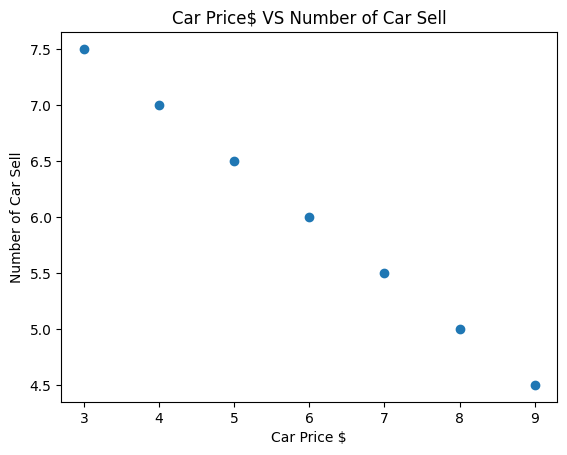

In [16]:
car_prices_array = [3,4,5,6,7,8,9]
car_price_np = np.array(car_prices_array, dtype=np.float32)
car_price_np = car_price_np.reshape(-1,1)
car_price_tensor = Variable(torch.from_numpy(car_price_np))

number_of_car_sell_array = [7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]
number_of_car_sell_np = np.array(number_of_car_sell_array, dtype=np.float32)
number_of_car_sell_np = number_of_car_sell_np.reshape(-1, 1)
number_of_car_sell_tensor = Variable(torch.from_numpy(number_of_car_sell_np))

import matplotlib.pyplot as plt
plt.scatter(car_prices_array, number_of_car_sell_array)
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Car Price$ VS Number of Car Sell")
plt.show()

In [17]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import warnings
warnings.filterwarnings("ignore")

class LinearRegression(nn.Module):
  def __init__(self, input_size, output_size):
    super(LinearRegression, self).__init__()
    self.linear = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    return self.linear(x)

epoch [], loss []
epoch [], loss []
epoch [], loss []
epoch [], loss []
epoch [], loss []
epoch [], loss []
epoch [], loss []
epoch [], loss []
epoch [], loss []
epoch [], loss []
epoch [], loss []
epoch [], loss []
epoch [], loss []
epoch [], loss []
epoch [], loss []
epoch [], loss []
epoch [], loss []
epoch [], loss []
epoch [], loss []
epoch [], loss []
epoch [], loss []


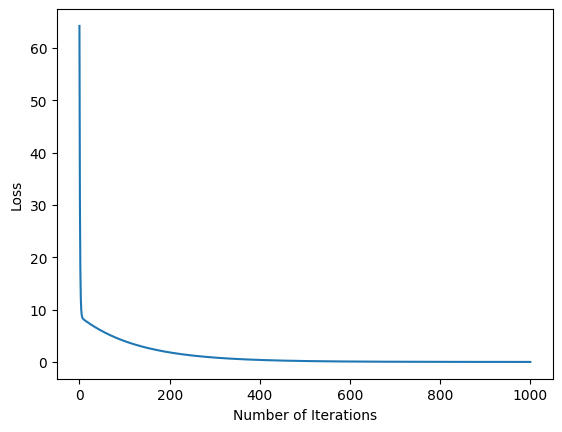

In [18]:
input_dim = 1
output_dim = 1
model = LinearRegression(input_dim, output_dim)

mse = nn.MSELoss()

learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

loss_list = []
iteration_number = 1001
for iteration in range(iteration_number):
  optimizer.zero_grad()

  results = model(car_price_tensor)

  loss = mse(results, number_of_car_sell_tensor)

  loss.backward()

  optimizer.step()

  loss_list.append(loss.data)

  if(iteration % 50 == 0):
    print('epoch [], loss []'.format(iteration, loss.data))

plt.plot(range(iteration_number),loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()

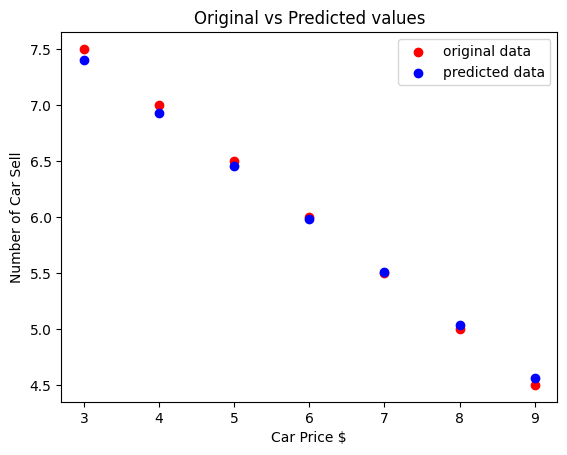

In [19]:
predicted = model(car_price_tensor).data.numpy()
plt.scatter(car_prices_array, number_of_car_sell_array, label = "original data", color = "red")
plt.scatter(car_prices_array, predicted,label = "predicted data", color = "blue")

plt.legend()
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Original vs Predicted values")
plt.show()

In [20]:
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split

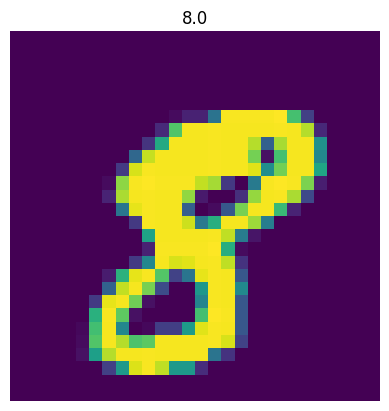

In [25]:
train = pd.read_csv(r"./input/train.csv", dtype = np.float32)

targets_numpy = train.label.values
features_numpy = train.loc[:,train.columns != "label"].values/255

features_train, features_test, targets_train, targets_test = train_test_split(features_numpy,
                                                                             targets_numpy,
                                                                             test_size = 0.2,
                                                                             random_state = 42)

featuresTrain = torch.from_numpy(features_train)
targetsTrain = torch.from_numpy(targets_train).type(torch.LongTensor)

featuresTest = torch.from_numpy(features_test)
targetsTest = torch.from_numpy(targets_test).type(torch.LongTensor)

batch_size = 100
n_iters = 10000
num_epochs = n_iters / (len(features_train) / batch_size)
num_epochs = int(num_epochs)

train = torch.utils.data.TensorDataset(featuresTrain, targetsTrain)
test = torch.utils.data.TensorDataset(featuresTest, targetsTest)

train_loader = DataLoader(train, batch_size = batch_size, shuffle = False)
test_loader = DataLoader(test, batch_size = batch_size, shuffle = False)

plt.imshow(features_numpy[10].reshape(28,28))
plt.axis("off")
plt.title(str(targets_numpy[10]))
plt.savefig('graph.png')
plt.show()

In [26]:
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    def forward(self, x):
      out = self.linear(x)
      return out

input_dim = 28*28
output_dim = 10

model = LogisticRegressionModel(input_dim, output_dim)

error = nn.CrossEntropyLoss()

learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [27]:
count = 0
loss_list = []
iteration_list = []
for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    train = Variable(images.view(-1, 28*28))
    labels = Variable(labels)

    optimizer.zero_grad()

    outputs = model(train)

    loss = error(outputs, labels)

    loss.backward()

    optimizer.step()

    count += 1

    if count % 50 == 0:

            correct = 0
            total = 0

            for images, labels in test_loader:
                test = Variable(images.view(-1, 28*28))

                outputs = model(test)

                predicted = torch.max(outputs.data, 1)[1]

                total += len(labels)

                correct += (predicted == labels).sum()

            accuracy = 100 * correct / float(total)

            loss_list.append(loss.data)
            iteration_list.append(count)
    if count % 500 == 0:

            print('Iteration: {}  Loss: {}  Accuracy: {}%'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 1.8115407228469849  Accuracy: 66.78571319580078%
Iteration: 1000  Loss: 1.5809303522109985  Accuracy: 74.95237731933594%
Iteration: 1500  Loss: 1.274997591972351  Accuracy: 77.70237731933594%
Iteration: 2000  Loss: 1.1914739608764648  Accuracy: 79.98809814453125%
Iteration: 2500  Loss: 1.0296536684036255  Accuracy: 81.02381134033203%
Iteration: 3000  Loss: 0.9339433312416077  Accuracy: 81.89286041259766%
Iteration: 3500  Loss: 0.8981205224990845  Accuracy: 82.45237731933594%
Iteration: 4000  Loss: 0.7492486834526062  Accuracy: 82.96428680419922%
Iteration: 4500  Loss: 0.9741913676261902  Accuracy: 83.32142639160156%
Iteration: 5000  Loss: 0.8018667101860046  Accuracy: 83.63095092773438%
Iteration: 5500  Loss: 0.7580203413963318  Accuracy: 83.91666412353516%
Iteration: 6000  Loss: 0.8758180141448975  Accuracy: 84.28571319580078%
Iteration: 6500  Loss: 0.6715490221977234  Accuracy: 84.61904907226562%
Iteration: 7000  Loss: 0.7184747457504272  Accuracy: 84.75%
Iterat

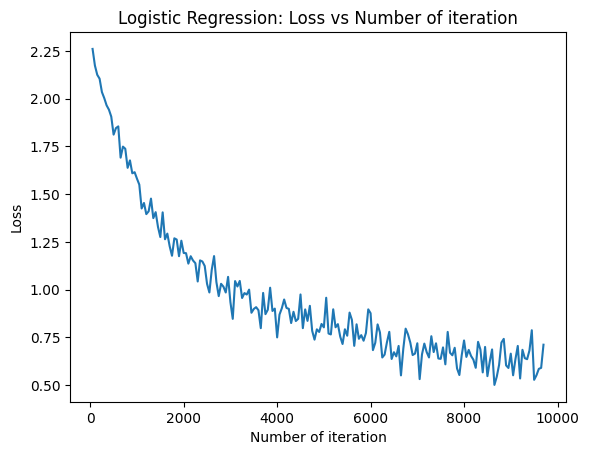

In [28]:
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("Logistic Regression: Loss vs Number of iteration")
plt.show()

In [29]:
import torch
import torch.nn as nn
from torch.autograd import Variable

In [30]:
class ANNModel(nn.Module):

    def __init__(self, input_dim, hidden_dim, output_dim):
        super(ANNModel, self).__init__()

        self.fc1 = nn.Linear(input_dim, hidden_dim)

        self.relu1 = nn.ReLU()

        self.fc2 = nn.Linear(hidden_dim, hidden_dim)

        self.tanh2 = nn.Tanh()

        self.fc3 = nn.Linear(hidden_dim, hidden_dim)

        self.elu3 = nn.ELU()

        self.fc4 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):

        out = self.fc1(x)

        out = self.relu1(out)

        out = self.fc2(out)

        out = self.tanh2(out)

        out = self.fc3(out)

        out = self.elu3(out)

        out = self.fc4(out)
        return out

input_dim = 28*28
hidden_dim = 150
output_dim = 10

model = ANNModel(input_dim, hidden_dim, output_dim)

error = nn.CrossEntropyLoss()

learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [31]:
count = 0
loss_list = []
iteration_list = []
accuracy_list = []
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        train = Variable(images.view(-1, 28*28))
        labels = Variable(labels)

        optimizer.zero_grad()

        outputs = model(train)

        loss = error(outputs, labels)

        loss.backward()

        optimizer.step()

        count += 1

        if count % 50 == 0:

            correct = 0
            total = 0

            for images, labels in test_loader:

                test = Variable(images.view(-1, 28*28))

                outputs = model(test)

                predicted = torch.max(outputs.data, 1)[1]

                total += len(labels)

                correct += (predicted == labels).sum()

            accuracy = 100 * correct / float(total)

            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        if count % 500 == 0:

            print('Iteration: {}  Loss: {}  Accuracy: {} %'.format(count, loss.data, accuracy))

Iteration: 500  Loss: 0.7930493354797363  Accuracy: 76.72618865966797 %
Iteration: 1000  Loss: 0.45537739992141724  Accuracy: 87.63095092773438 %
Iteration: 1500  Loss: 0.23218637704849243  Accuracy: 89.78571319580078 %
Iteration: 2000  Loss: 0.2950479984283447  Accuracy: 90.5952377319336 %
Iteration: 2500  Loss: 0.2987271249294281  Accuracy: 92.05952453613281 %
Iteration: 3000  Loss: 0.11771482229232788  Accuracy: 92.73809814453125 %
Iteration: 3500  Loss: 0.25362691283226013  Accuracy: 93.47618865966797 %
Iteration: 4000  Loss: 0.06257221102714539  Accuracy: 94.08333587646484 %
Iteration: 4500  Loss: 0.30918052792549133  Accuracy: 94.4047622680664 %
Iteration: 5000  Loss: 0.11211632937192917  Accuracy: 94.78571319580078 %
Iteration: 5500  Loss: 0.19814366102218628  Accuracy: 94.83333587646484 %
Iteration: 6000  Loss: 0.18314483761787415  Accuracy: 95.08333587646484 %
Iteration: 6500  Loss: 0.09286154061555862  Accuracy: 95.52381134033203 %
Iteration: 7000  Loss: 0.13508792221546173  

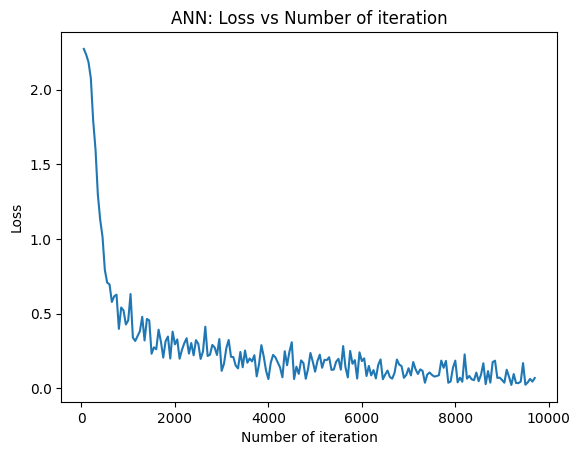

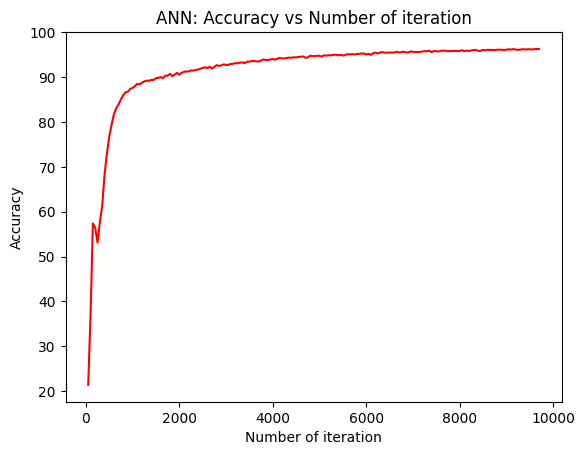

In [32]:
plt.plot(iteration_list,loss_list)
plt.xlabel("Number of iteration")
plt.ylabel("Loss")
plt.title("ANN: Loss vs Number of iteration")
plt.show()

plt.plot(iteration_list,accuracy_list,color = "red")
plt.xlabel("Number of iteration")
plt.ylabel("Accuracy")
plt.title("ANN: Accuracy vs Number of iteration")
plt.show()